# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
#importamos librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer


import folium
import plotly.express as px

In [ ]:
csv_path_cca = '/content/drive/MyDrive/Data Science/Colab Notebooks/Projects/Capstone - EasyMoney/Data/customer_commercial_activity.csv'
csv_path_cp = '/content/drive/MyDrive/Data Science/Colab Notebooks/Projects/Capstone - EasyMoney/Data/customer_products.csv'
csv_path_cs = '/content/drive/MyDrive/Data Science/Colab Notebooks/Projects/Capstone - EasyMoney/Data/customer_sociodemographics.csv'
csv_path_pd = '/content/drive/MyDrive/Data Science/Colab Notebooks/Projects/Capstone - EasyMoney/Data/product_description.csv'
csv_path_sales = '/content/drive/MyDrive/Data Science/Colab Notebooks/Projects/Capstone - EasyMoney/Data/sales.csv'

In [ ]:
cca = pd.read_csv(csv_path_cca, sep = ",", index_col=0)
cp = pd.read_csv(csv_path_cp, sep = ",", index_col=0)
cs = pd.read_csv(csv_path_cs, sep = ",", index_col=0)
prd = pd.read_csv(csv_path_pd, sep = ",", index_col=0)
sales = pd.read_csv(csv_path_sales, sep = ",", index_col=0)

# Limpieza y analisi datasets

## Customer Comercial Activity

In [ ]:
cca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   entry_channel    object 
 4   active_customer  float64
 5   segment          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 318.5+ MB


In [ ]:
cca.head(3)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01,2018-01,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO


### Limpieza

In [ ]:
cca.duplicated().sum()

0

##### Nulos

In [ ]:
cca.isnull().sum()

pk_cid                  0
pk_partition            0
entry_date              0
entry_channel      133033
active_customer         0
segment            133944
dtype: int64

In [ ]:
cca['segment'] = cca['segment'].fillna('00 - DESCONOCIDO')
cca['entry_channel'] = cca['entry_channel'].fillna('ZZZ')

##### Transformación variables

In [ ]:
cca['segment_id'] = OrdinalEncoder().fit_transform(cca[['segment']])
cca['entry_channel_id'] = OrdinalEncoder().fit_transform(cca[['entry_channel']])

In [ ]:
cca['segment_id'] = cca['segment_id'].astype(int)
cca['entry_channel_id'] = cca['entry_channel_id'].astype(int)
cca['active_customer'] = cca['active_customer'].astype(int)
cca['entry_date'] = pd.to_datetime(cca['entry_date'], format='%Y-%m').dt.to_period('M')

In [ ]:
ordercolumns_cca = ['pk_partition', 'entry_date', 'pk_cid', 'entry_channel', 'entry_channel_id', 'segment', 'segment_id', 'active_customer']
cca = cca[ordercolumns_cca]

In [ ]:
def nulos_cca(cca):
  cca['segment'] = cca['segment'].fillna('00 - DESCONOCIDO')
  cca['entry_channel'] = cca['entry_channel'].fillna('ZZZ')

  return cca

In [ ]:
def preprocess_cca(cca):
  # Crear id de variables catgoricas
  cca['segment_id'] = OrdinalEncoder().fit_transform(cca[['segment']])
  cca['entry_channel_id'] = OrdinalEncoder().fit_transform(cca[['entry_channel']])
  # Cambiar dtype adecuado
  cca['segment_id'] = cca['segment_id'].astype(int)
  cca['entry_channel_id'] = cca['entry_channel_id'].astype(int)
  cca['active_customer'] = cca['active_customer'].astype(int)
  cca['entry_date'] = pd.to_datetime(cca['entry_date'], format='%Y-%m').dt.to_period('M')
  # Ordenar columnas
  ordercolumns_cca = ['pk_partition', 'entry_date', 'pk_cid', 'entry_channel', 'entry_channel_id', 'segment', 'segment_id', 'active_customer']
  cca = cca[ordercolumns_cca]

In [ ]:
MIN_ENTRY_DATE = cca['entry_date'].min()
MAX_ENTRY_DATE = cca['entry_date'].max()

In [ ]:
print(MIN_ENTRY_DATE, ': Fecha primera contratación cliente más antiguo.')
print(MAX_ENTRY_DATE, ': Fecha primera contratación cliente más nuevo.')

2015-01 : Fecha primera contratación cliente más antiguo.
2019-05 : Fecha primera contratación cliente más nuevo.


In [ ]:
# FUNCIONES
  # def nulos_cca(cca)
  # def preprocess_cca(cca)

In [ ]:
cca.head(3)

,pk_partition,entry_date,pk_cid,entry_channel,entry_channel_id,segment,segment_id,active_customer
0,2018-01,2018-01,1375586,KHL,60,02 - PARTICULARES,2,1
1,2018-01,2015-08,1050611,KHE,57,03 - UNIVERSITARIO,3,0
2,2018-01,2015-08,1050612,KHE,57,03 - UNIVERSITARIO,3,0


In [ ]:
colspB_cca = ['entry_date', 'pk_cid', 'entry_channel', 'segment']
cca_pB = cca[colspB_cca]

## Customer products

In [ ]:
cp.shape

(5962924, 17)

In [ ]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   short_term_deposit  int64  
 3   loans               int64  
 4   mortgage            int64  
 5   funds               int64  
 6   securities          int64  
 7   long_term_deposit   int64  
 8   em_account_pp       int64  
 9   credit_card         int64  
 10  payroll             float64
 11  pension_plan        float64
 12  payroll_account     int64  
 13  emc_account         int64  
 14  debit_card          int64  
 15  em_account_p        int64  
 16  em_acount           int64  
dtypes: float64(2), int64(14), object(1)
memory usage: 818.9+ MB


In [ ]:
cp.head(3)

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1050611,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,1050612,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


### Limpieza

##### Nulos

In [ ]:
cp.duplicated().sum()

0

In [ ]:
cp.isnull().sum()

pk_cid                 0
pk_partition           0
short_term_deposit     0
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit      0
em_account_pp          0
credit_card            0
payroll               61
pension_plan          61
payroll_account        0
emc_account            0
debit_card             0
em_account_p           0
em_acount              0
dtype: int64

In [ ]:
cp['payroll'].value_counts()

0.0    5757076
1.0     205787
Name: payroll, dtype: int64

In [ ]:
cp['pension_plan'].value_counts()

0.0    5745061
1.0     217802
Name: pension_plan, dtype: int64

In [ ]:
# Imputamos nulos a variable minoritaria
cp['payroll'] = cp['payroll'].fillna(1)
cp['pension_plan'] = cp['pension_plan'].fillna(1)
# Cambiamos dtype
cp['payroll'] = cp['payroll'].astype(int)
cp['pension_plan'] = cp['pension_plan'].astype(int)

In [ ]:
def nulos_cp(cp):
  cp['payroll'] = cp['payroll'].fillna(1)
  cp['pension_plan'] = cp['pension_plan'].fillna(1)

  cp['payroll'] = cp['payroll'].astype(int)
  cp['pension_plan'] = cp['pension_plan'].astype(int)

  return cp

### Análisis varianza

In [ ]:
cols_sin_varianza = [column for column in cp.columns if cp[column].nunique(dropna = False) == 1]

cols_poca_varianza = []
for column in cp.columns:
    unique_values = cp[column].unique()
    if len(unique_values) == 2:
        counts = cp[column].value_counts(normalize=True)
        if counts[0] >= 0.98 or counts[0] <= 0.02:
            cols_poca_varianza.append(column)

cols_media_varianza = []
for column in cp.columns:
    if column not in cols_sin_varianza and column not in cols_poca_varianza:

        cols_media_varianza.append(column)

In [ ]:
print(cols_sin_varianza)
print(cols_poca_varianza)
print(cols_media_varianza)

['em_account_pp']
['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'credit_card', 'em_account_p']
['pk_cid', 'pk_partition', 'payroll', 'pension_plan', 'payroll_account', 'emc_account', 'debit_card', 'em_acount']


In [ ]:
def analisis_varianza(cp):
  cols_sin_varianza = [column for column in cp.columns if cp[column].nunique(dropna = False) == 1]

  cols_poca_varianza = []
  for column in cp.columns:
    unique_values = cp[column].unique()
    if len(unique_values) == 2:
        counts = cp[column].value_counts(normalize=True)
        if counts[0] >= 0.98 or counts[0] <= 0.02:
            cols_poca_varianza.append(column)
  cols_media_varianza = []
  for column in cp.columns:
    if column not in cols_sin_varianza and column not in cols_poca_varianza:

        cols_media_varianza.append(column)

  return cols_sin_varianza
  return cols_poca_varianza
  return cols_media_varianza

###### Analisis nula o poca varianza

In [ ]:
for c in cp[cols_poca_varianza]:
  print(cp[c].value_counts(normalize=True))

0    0.997418
1    0.002582
Name: short_term_deposit, dtype: float64
0    0.999922
1    0.000078
Name: loans, dtype: float64
0    0.999946
1    0.000054
Name: mortgage, dtype: float64
0    0.996629
1    0.003371
Name: funds, dtype: float64
0    0.996288
1    0.003712
Name: securities, dtype: float64
0    0.983119
1    0.016881
Name: long_term_deposit, dtype: float64
0    0.988116
1    0.011884
Name: credit_card, dtype: float64
0    0.999994
1    0.000006
Name: em_account_p, dtype: float64


In [ ]:
cols_media_varianza.remove('pk_partition')
cols_media_varianza.remove('pk_cid')

In [ ]:
for c in cp[cols_media_varianza]:
  print(cp[c].value_counts(normalize=True))

0    0.965479
1    0.034521
Name: payroll, dtype: float64
0    0.963464
1    0.036536
Name: pension_plan, dtype: float64
0    0.944755
1    0.055245
Name: payroll_account, dtype: float64
0    0.945168
1    0.054832
Name: emc_account, dtype: float64
0    0.905589
1    0.094411
Name: debit_card, dtype: float64
1    0.734808
0    0.265192
Name: em_acount, dtype: float64


In [ ]:
# FUNCIONES CP

  # nulos_cp(cp)
  # analisis_varianza(cp)

## Customer sociodemographic

In [ ]:
cs.shape

(5962924, 8)

In [ ]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   float64
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
dtypes: float64(2), int64(2), object(4)
memory usage: 409.4+ MB


In [ ]:
cs.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01,ES,29.0,H,35,N,87218.10
1,1050611,2018-01,ES,13.0,V,23,N,35548.74
2,1050612,2018-01,ES,13.0,V,23,N,122179.11
3,1050613,2018-01,ES,50.0,H,22,N,119775.54
4,1050614,2018-01,ES,50.0,V,23,N,NaN


##### Nulos

In [ ]:
cs.duplicated().sum()

0

In [ ]:
cs.isnull().sum()

pk_cid                0
pk_partition          0
country_id            0
region_code        2264
gender               25
age                   0
deceased              0
salary          1541104
dtype: int64

In [ ]:
cs['gender'].value_counts(dropna=False)

H      3087137
V      2874687
NaN         25
Name: gender, dtype: int64

In [ ]:
# Imputamos nulos
cs['gender'] = SimpleImputer(strategy = "most_frequent").fit_transform(cs[['gender']])

In [ ]:
# NOs quedamos solo con los que actualmente estan vivos
cs = cs[cs['deceased']=='N']

In [ ]:
def nulos_cs(cs):
  # Imputamos nulos con valor extremo.
  #cs['salary'] = cs['salary'].fillna(0)
  c#s['region_code'] = cs['region_code'].fillna(99)

  # Imputamos nulos al mas frecuente
  cs['gender'] = SimpleImputer(strategy = "most_frequent").fit_transform(cs[['gender']])

  return cs

In [ ]:
colspB_cs = ['pk_cid', 'country_id', 'gender','age']
cs_pB = cs[colspB_cs]

## Sales

In [ ]:
sales.shape

(240773, 5)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240773 entries, 0 to 240772
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   pk_sale     240773 non-null  int64  
 1   cid         240773 non-null  int64  
 2   month_sale  240773 non-null  object 
 3   product_ID  240773 non-null  int64  
 4   net_margin  240773 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 11.0+ MB


###Limpieza

##### Nulos

In [ ]:
sales.duplicated().sum()

0

In [ ]:
sales.isnull().sum()

pk_sale       0
cid           0
month_sale    0
product_ID    0
net_margin    0
dtype: int64

##### Transformación variables

In [ ]:
sales['month_sale'] = pd.to_datetime(sales['month_sale'], format = '%Y-%m')

In [ ]:
# Cambiamos nombre atributo para posterior Join
sales['pk_cid'] = sales['cid']
sales.drop('cid', axis=1, inplace=True)

# Cambiamos dtypes
sales['month_sale'] = pd.to_datetime(sales['month_sale'], format = '%Y-%m')

In [ ]:
def preprocess_sales(sales):
  # Cambiamos nombre atributo para posterior Join
  sales['pk_cid'] = sales['cid']
  # Cambiamos dtypes
  sales['month_sale'] = pd.to_datetime(sales['month_sale'], format = '%Y-%m').dt.to_period('M')

  return sales

### Análisis

In [ ]:
sales.head()

,pk_sale,month_sale,product_ID,net_margin,pk_cid
0,6666,2018-05,2335,952.9,33620
1,6667,2018-06,2335,1625.2,35063
2,6668,2018-02,2335,1279.7,37299
3,6669,2018-02,2335,1511.9,39997
4,6670,2018-02,2335,1680.3,44012


Rango meses de venta

In [ ]:
MIN_TIME_SALE = sales['month_sale'].min()
MAX_TIME_SALE = sales['month_sale'].max()
print('El primer mes de venta es: ', MIN_TIME_SALE)
print('El última mes de venta es: ', MAX_TIME_SALE)

El primer mes de venta es:  2018-02-01 00:00:00
El última mes de venta es:  2019-05-01 00:00:00


In [ ]:
#sales['pk_sale'].nunique()

240773

In [ ]:
#sales['product_ID'].nunique()

13

Ventas y beneficios por mes

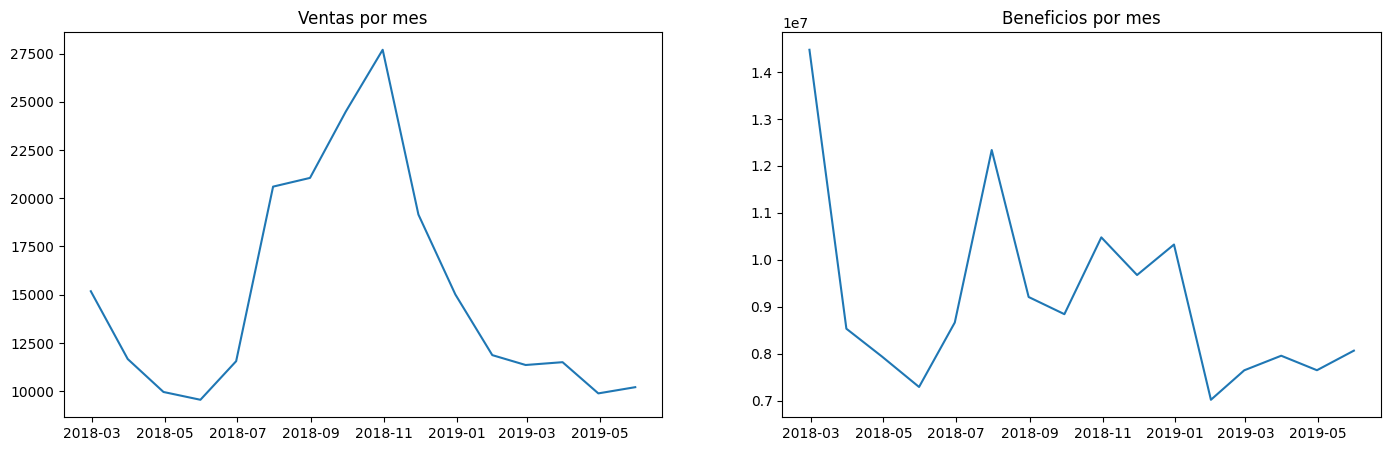

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))

axes[0].plot(sales.set_index('month_sale').resample('M')['pk_sale'].count(), label='Ventas')
axes[0].set_title('Ventas por mes')

axes[1].plot(sales.set_index('month_sale').resample('M')['net_margin'].sum(), label='Margen Neto')
axes[1].set_title('Beneficios por mes')

plt.show()

In [ ]:
sales_agg_month = sales.set_index('month_sale').resample('M').agg({
    'pk_sale': 'count', 'net_margin': 'sum', 'product_ID': 'count'}).rename(columns={
        'pk_sale': 'Total_ventas', 'net_margin': 'Total_beneficios', 'product_ID': 'Productos_vendidos'
        })
sales_agg_month

,Total_ventas,Total_beneficios,Productos_vendidos
month_sale,,,
2018-02-28,15182,14473407.7,15182
2018-03-31,11668,8533605.8,11668
2018-04-30,9962,7938591.3,9962
2018-05-31,9558,7293002.0,9558
2018-06-30,11558,8665634.3,11558
2018-07-31,20602,12338735.7,20602
2018-08-31,21054,9208904.5,21054
2018-09-30,24488,8843160.8,24488
2018-10-31,27693,10478711.5,27693


In [ ]:
# Cada venta está asociada a un solo producto, por lo que el total de productos vendidos por mes es el mismo que el total de ventas por mes.

In [ ]:
def analisis_sales(sales):
  sales_agg_month = sales.set_index('month_sale').resample('M').agg({
    'pk_sale': 'count', 'net_margin': 'sum', 'product_ID': 'count'}).rename(columns={
        'pk_sale': 'Total_ventas', 'net_margin': 'Total_beneficios', 'product_ID': 'Productos_vendidos'
        })
  return sales_agg_month

Productos vendidos

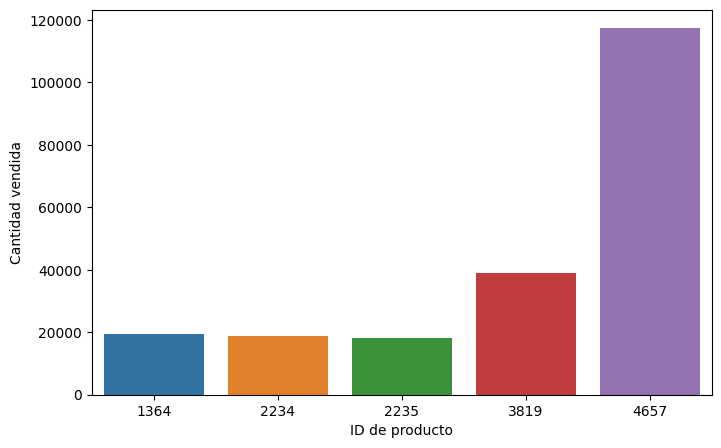

In [ ]:
product_counts = sales['product_ID'].value_counts().sort_values(ascending = False).head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.xlabel('ID de producto')
plt.ylabel('Cantidad vendida')
plt.show()

In [ ]:
# FUNCIONES SALES:
  # preprocess_sales(sales)
  # analisis_sales(sales)

In [ ]:
sales['month_sale'] = pd.to_datetime(sales['month_sale'], format = '%Y-%m').dt.to_period('M')

In [ ]:
sales.columns

Index(['pk_sale', 'month_sale', 'product_ID', 'net_margin', 'pk_cid'], dtype='object')

In [ ]:
sales_pB = sales.copy()

## Product description

In [ ]:
prd.shape

(13, 3)

In [ ]:
prd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pk_product_ID   13 non-null     int64 
 1   product_desc    13 non-null     object
 2   family_product  13 non-null     object
dtypes: int64(1), object(2)
memory usage: 416.0+ bytes


In [ ]:
prd.head()

,pk_product_ID,product_desc,family_product
0,4657,em_acount,account
1,3819,debit_card,payment_card
2,1364,pension_plan,pension_plan
3,2234,payroll,account
4,2235,payroll_account,account


###Limpieza

##### Nulos

In [ ]:
prd.duplicated().sum()

0

In [ ]:
prd.isnull().sum()

pk_product_ID     0
product_desc      0
family_product    0
dtype: int64

##### Transformación de variables

In [ ]:
prd['product_ID'] = prd['pk_product_ID']
prd = prd.drop('pk_product_ID', axis = 1)
prd['family_product_id'] = OrdinalEncoder().fit_transform(prd[['family_product']])

In [ ]:
ordercols_prd = ['product_desc', 'product_ID', 'family_product', 'family_product_id']
prd = prd[ordercols_prd]

In [ ]:
def preprocess_prd(prd):
  prd['product_ID'] = prd['pk_product_ID']
  prd = prd.drop('pk_product_ID', axis = 1)
  prd['family_product_id'] = OrdinalEncoder().fit_transform(prd[['family_product']])

  ordercols_prd = ['product_desc', 'product_ID', 'family_product', 'family_product_id']
  prd = prd[ordercols_prd]

In [ ]:
# FUNCIONES PRODUCT DESCRP:
  # preprocess_prd(prd)

In [ ]:
colspB_prd = ['product_desc', 'product_ID', 'family_product']
prd_pB = prd[colspB_prd]

# Dataset para ventas

### Dataset para PowerBI

#####Creamos datasets reducidos especialmente para análisis y presentación PBI

Customer comercial activity

In [ ]:
cca_pB.columns

Index(['entry_date', 'pk_cid', 'entry_channel', 'segment'], dtype='object')

In [ ]:
cca_pB.duplicated().sum()
cca_pB = cs_pB.drop_duplicates()

Customer sociodemographics

In [ ]:
cs_pB.columns

Index(['pk_cid', 'country_id', 'gender', 'age'], dtype='object')

In [ ]:
cs_pB.duplicated().sum()
cs_pB = cs_pB.drop_duplicates()

Sales

In [ ]:
sales_pB.columns

Index(['pk_sale', 'month_sale', 'product_ID', 'net_margin', 'pk_cid'], dtype='object')

Products description

In [ ]:
prd_pB.columns

Index(['product_desc', 'product_ID', 'family_product'], dtype='object')

###### Pickles categoricos

In [ ]:
pd.to_pickle(cca_pB,"/content/drive/MyDrive/Data Science/Colab Notebooks/Projects/Capstone - EasyMoney/pickles/PowerBI/news/cca_pB")
pd.to_pickle(cs_pB,"/content/drive/MyDrive/Data Science/Colab Notebooks/Projects/Capstone - EasyMoney/pickles/PowerBI/news/cs_pB")
pd.to_pickle(prd_pB,"/content/drive/MyDrive/Data Science/Colab Notebooks/Projects/Capstone - EasyMoney/pickles/PowerBI/news/prd_pB")
pd.to_pickle(sales_pB,"/content/drive/MyDrive/Data Science/Colab Notebooks/Projects/Capstone - EasyMoney/pickles/PowerBI/news/sales_pB")

#####Creación dataset conjunto

In [ ]:
em_PBI = cca_pB.merge(sales_pB, left_on = 'pk_cid', right_on = 'pk_cid').merge(prd_pB, how = 'inner', on = 'product_ID')

In [ ]:
em_PBI.duplicated().sum()
em_PBI.drop_duplicates(inplace = True)

In [ ]:
cca_pB.columns

Index(['pk_cid', 'country_id', 'gender', 'age'], dtype='object')

In [ ]:
em_PBI.shape

(410542, 10)

In [ ]:
cs.columns

Index(['pk_cid', 'pk_partition', 'country_id', 'region_code', 'gender', 'age',
       'deceased', 'salary'],
      dtype='object')

In [ ]:
em_PBI.columns

Index(['entry_date', 'pk_cid', 'entry_channel', 'segment', 'pk_sale',
       'month_sale', 'product_ID', 'net_margin', 'product_desc',
       'family_product'],
      dtype='object')

In [ ]:
def seniority(row):

  if row['month_sale'] == row['entry_date']:
    return 'Nuevo'
  elif row['month_sale'] > row['entry_date']:
    return 'Antiguo'
  elif row['month_sale'] < row['entry_date']:
    return 'Error'

em_PBI['customer_tenure'] = em_PBI.apply(seniority, axis=1)
em_PBI = em_PBI.drop(em_PBI[em_PBI['customer_tenure'] == 'Error'].index, axis=0)

In [ ]:
ordercols_PBI = ['entry_date', 'customer_tenure', 'pk_cid', 'segment', 'pk_sale', 'month_sale', 'family_product', 'product_desc', 'product_ID', 'net_margin']
em_PBI = em_PBI[ordercols_PBI]

In [ ]:
#em_PBI.to_csv("/content/drive/MyDrive/Data Science/Colab Notebooks/Projects/Capstone - EasyMoney/pickles/PowerBI/news/em_PBI.csv", index = False)


In [ ]:
em_PBI['customer_tenure'].value_counts()

Antiguo    217628
Nuevo      173944
Name: customer_tenure, dtype: int64

### Análisis

#####Top 10 productos más vendidos

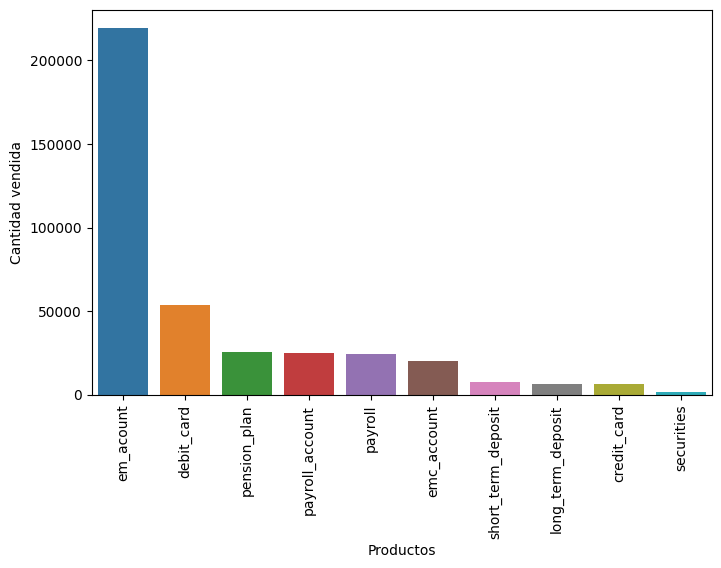

In [ ]:
product_counts = em_PBI['product_desc'].value_counts().sort_values(ascending = False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.xlabel('Productos')
plt.ylabel('Cantidad vendida')
plt.xticks(rotation='vertical')
plt.show()

#####Total compras y total beneficios en función de la antiguedad del cliente

###### Des de la primera compra (2018-02-01)

In [ ]:
em_PBI.columns

Index(['entry_date', 'customer_tenure', 'pk_cid', 'segment', 'pk_sale',
       'month_sale', 'family_product', 'product_desc', 'product_ID',
       'net_margin'],
      dtype='object')

In [ ]:
cols_cat = ['pk_cid', 'pk_sale']
em_PBI[cols_cat] = em_PBI[cols_cat].astype('category')

In [ ]:
Ventas_antigüedad = em_PBI.groupby('customer_tenure').agg({
    'pk_sale': 'count', 'net_margin': 'sum'}).rename(columns={
        'pk_sale': 'Total_compras', 'net_margin': 'Total_beneficios'
        })

Ventas_antigüedad['Media_por_producto'] = round(Ventas_antigüedad['Total_beneficios'] / Ventas_antigüedad['Total_compras'], 2)
Ventas_antigüedad

,Total_compras,Total_beneficios,Media_por_producto
customer_tenure,,,
Antiguo,217628,177689341.9,816.48
Nuevo,173944,23804568.9,136.85


Text(0.5, 1.0, 'Total beneficios')

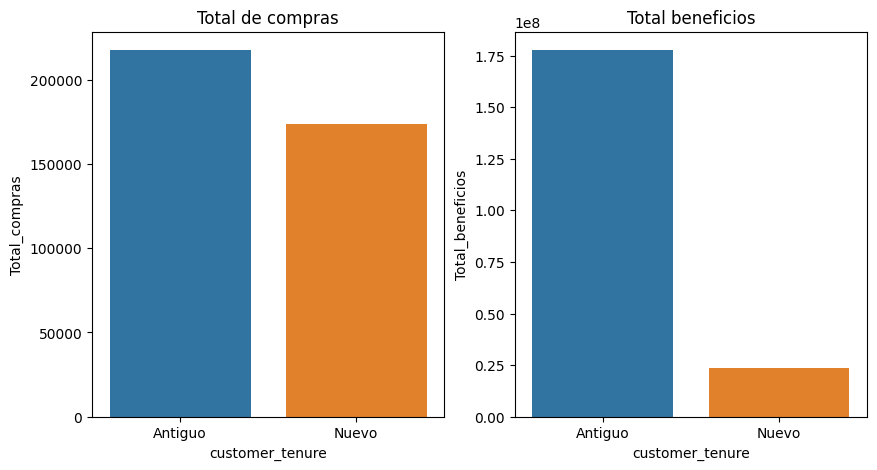

In [ ]:
plt.figure(figsize=(10,5))

ax1 = plt.subplot(1,2,1)
ax1 = sns.barplot(data=Ventas_antigüedad, x=Ventas_antigüedad.index, y='Total_compras')
ax1.set_title('Total de compras')
ax2 = plt.subplot(1,2,2)
ax2 = sns.barplot(data=Ventas_antigüedad, x=Ventas_antigüedad.index, y='Total_beneficios')
ax2.set_title('Total beneficios')



In [ ]:
em_PBI.groupby(['month_sale', 'customer_tenure']).agg({
    'pk_sale': 'count', 'net_margin': 'sum'}).rename(columns={
        'pk_sale': 'Total_ventas', 'net_margin': 'Total_beneficios'
        })


Total_ventas  Total_beneficios
month_sale customer_tenure                                
2018-02    Antiguo                 13062        14197052.4
           Nuevo                    2930          946818.0
2018-03    Antiguo                  9865         8313621.9
           Nuevo                    2664          767236.6
2018-04    Antiguo                  8526         7857338.6
           Nuevo                    2291          644962.3
2018-05    Antiguo                  8169         7253257.3
           Nuevo                    2421          570975.7
2018-06    Antiguo                 10319         8697605.8
           Nuevo                    2455          725393.1
2018-07    Antiguo                 10016        11945323.9
           Nuevo                   25083         2997690.6
2018-08    Antiguo                 15424        10082474.2
           Nuevo                   23337         2694888.8
2018-09    Antiguo                 12565         9890745.9
           Nuevo                   33165         3616538.6
2018-10    Antiguo                 18542        12803841.9
           Nuevo                   32938         3506524.2
2018-11    Antiguo                 17819        12945736.5
           Nuevo                   17002         2098887.7
2018-12    Antiguo                 18951        15241174.2
           Nuevo                    6731         1279744.3
2019-01    Antiguo                 13864        10230241.2
           Nuevo                    7821         1198673.8
2019-02    Antiguo                 15518        11730055.1
           Nuevo                    5184          936115.6
2019-03    Antiguo                 16072        12330243.4
           Nuevo                    4672          752145.3
2019-04    Antiguo                 14031        11645096.9
           Nuevo                    3606          810740.7
2019-05    Antiguo                 14885        12525532.7
           Nuevo                    1644          257233.6

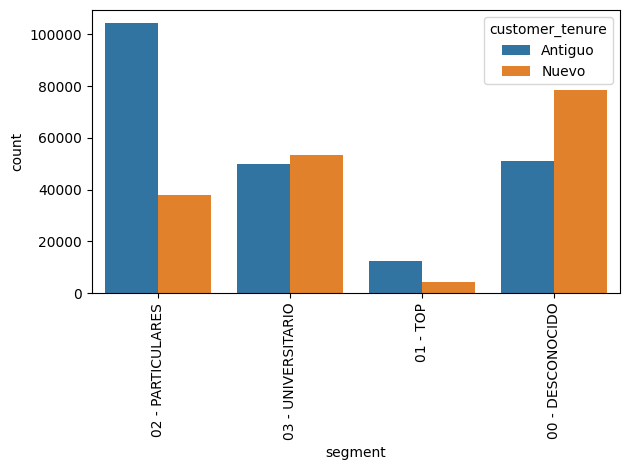

In [ ]:
# Antigüedad del cliente en función de segmento comercial

sns.countplot(data= em_PBI, x= 'segment', hue= 'customer_tenure')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

###### Des de hace seis meses (2018-11-01)

In [ ]:
em_PBI_seism = em_PBI[em_PBI['month_sale']>'2018-11-01']

In [ ]:
V_antig_seism = em_PBI_seism.groupby('customer_tenure').agg({
    'pk_sale': 'count', 'net_margin': 'sum'}).rename(columns={
        'pk_sale': 'Total_compras', 'net_margin': 'Total_beneficios'
        })

V_antig_seism['Media_por_producto'] = round(V_antig_seism['Total_beneficios'] / V_antig_seism['Total_compras'], 2)
V_antig_seism

,Total_compras,Total_beneficios,Media_por_producto
customer_tenure,,,
Antiguo,93321,73702343.5,789.77
Nuevo,29658,5234653.3,176.50


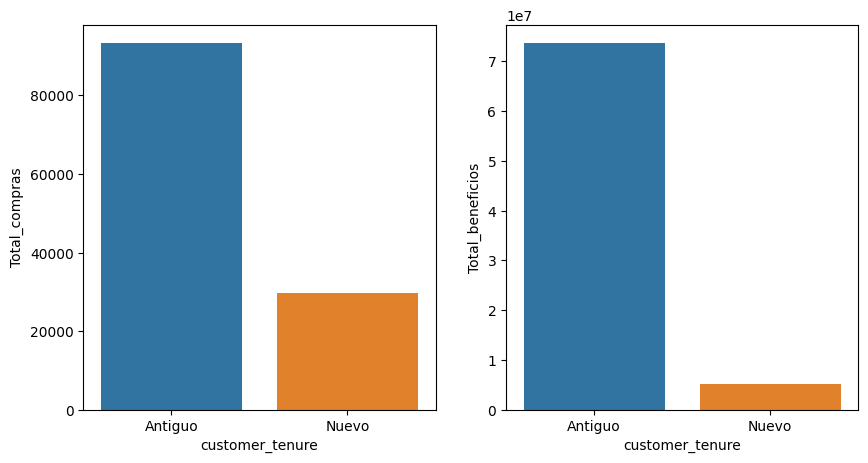

In [ ]:
plt.figure(figsize=(10,5))

ax1 = plt.subplot(1,2,1)
ax1 = sns.barplot(data=V_antig_seism, x=V_antig_seism.index, y='Total_compras')
ax2 = plt.subplot(1,2,2)
ax2 = sns.barplot(data=V_antig_seism, x=V_antig_seism.index, y='Total_beneficios')